In [2]:
# Adding src module to path
import sys
import os
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [6]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM,  RandomHamiltonian, IsingHamiltonianReduced


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [7]:

#Initializing starting values 



In [5]:
visible_list = []
hidden_list = []
hidden_size = 1

date_format = '%H:%M'
for v in range(2,8):
    np.random.seed(seed)
    visible_size = v
    

    hamiltonian = RandomHamiltonian(n=v)
    eig,_ = np.linalg.eigh(hamiltonian)
    E_truth = np.min(eig)
    
    while(True):
        
        h = hidden_size
        print(f"Current hidden size is: {hidden_size}, current visible size is: {visible_size}, at {datetime.now().strftime(date_format)}")
        rbm = RBM(visible_size=visible_size, hidden_size=h, hamiltonian=hamiltonian, walker_steps=2000)
        
        energies = rbm.train(iterations=2000, lr=0.01, print_energy=False, termination_condition=(0.01, E_truth))
        print(f"Error: {utils.relative_error(energies[-1], E_truth):.4f}, iterations: {len(energies)}")
        
        if utils.relative_error(energies[-1], E_truth) < 0.01:
            visible_list.append(v)
            hidden_list.append(h)
            break
        else:
            hidden_size+=1
        



NameError: name 'IsingHamiltonianReduced' is not defined

<IPython.core.display.Javascript object>


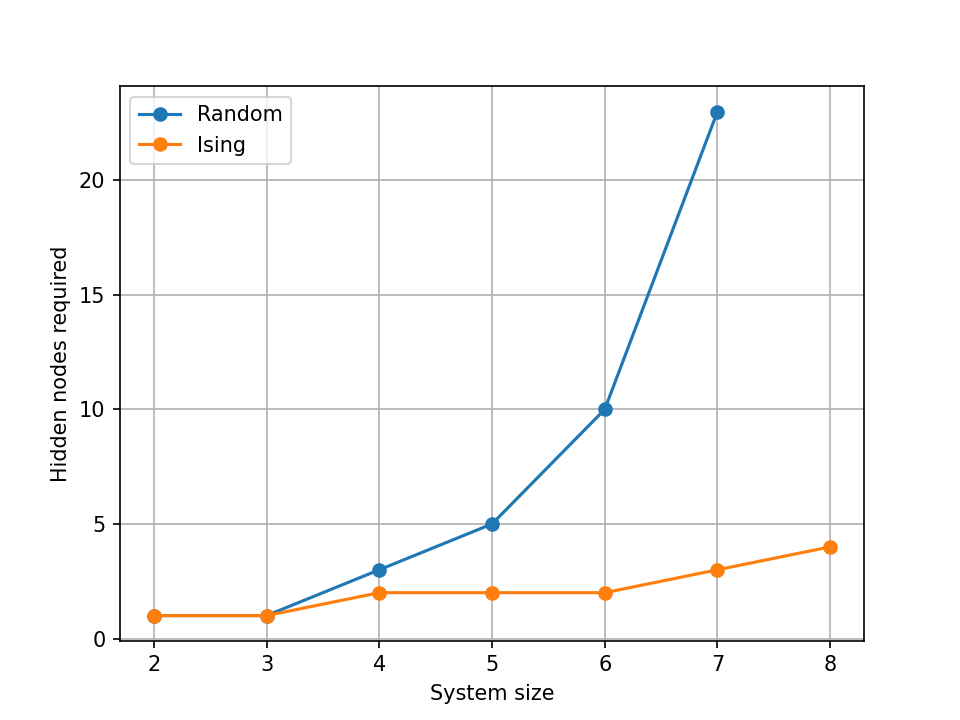

In [5]:
#labels = [f"Hidden size= {i}" for i in range(1,5)]


import math

#yint = range(math.floor(min(hidden_list)), math.ceil(max(hidden_list))+1)

plt.figure(0)
#plt.yticks(yint)
#plt.plot(visible_list, hidden_list, marker='o')
plt.plot([2, 3, 4, 5, 6, 7], [1, 1, 3, 5, 10, 23],marker='o') # Random
plt.plot([2, 3, 4, 5, 6, 7, 8], [1, 1, 2, 2, 2, 3, 4], marker='o') # Ising

plt.ylabel("Hidden nodes required")
plt.xlabel(r'System size')
plt.grid()
plt.legend(['Random', 'Ising'])






In [48]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/HiddenRequiredLinear.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

In [27]:
labels.append("True energy")
plt.figure(i)
# plt.ioff() # uncomment to stop plotting in notebook

yint = range(min(visible_list), math.ceil(visible_list))+1)
matplotlib.pyplot.yticks(yint)

for energy in energy_list:
    plt.plot(energy)
    plt.xlabel('Gradient steps')
    plt.ylabel('Energy')

plt.title(f"Training of RBM with {visible_size} visible nodes")
plt.axhline(y=E_truth, color='k', linestyle='--')
plt.legend(labels)

SyntaxError: unmatched ')' (3754981353.py, line 5)

In [6]:

# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d;%H%M'

path = f"{desktop_path}\\{datetime.now().strftime(date_format)}-2_node_plots"
os.makedirs(path)
plt.savefig(f"{path}/{n_vis}nodes.pdf")

NameError: name 'n_vis' is not defined